In [1]:
import pandas as pd
import seaborn as sns
import re
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('stopwords')


In [2]:
from nltk.corpus import stopwords

In [3]:
data = pd.read_csv("BBC News Train.csv")

In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
data['Text']

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

# features

In [6]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

# removing null values

In [7]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# data ma kk rahichha bhanara not imp to preprocessing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

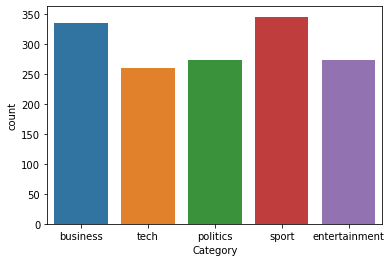

In [9]:
sns.countplot(data.Category)

In [10]:
data["News_length"] = data["Text"].str.len()

In [11]:
data["News_length"]

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='News_length', ylabel='Density'>

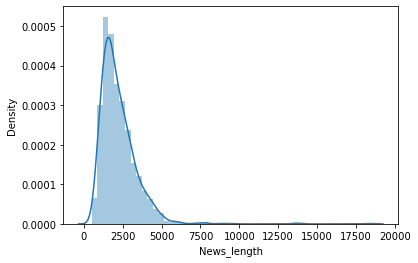

In [12]:
sns.distplot(data["News_length"])

# Cleaning Data

In [15]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r',' ').strip()
    text = re.sub(' +',' ',text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    #removing stop word

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    text = ' '.join(filtered_sentence)
    return text

In [16]:
data["Text_parsed"] = data['Text'].apply(process_text)

In [17]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# lable encoding

In [18]:
lable_encoder = preprocessing.LabelEncoder()
data['Category_target'] = lable_encoder.fit_transform(data['Category'])

In [19]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [20]:
data.to_csv("BBC_News_Processed.csv")

# spliting Data into train test split

In [21]:
X_train , X_test , y_train , y_test = train_test_split(data['Text_parsed'],
                                                      data['Category_target'],
                                                      test_size = 0.2,
                                                      random_state = 8)



In [22]:
X_train.shape

(1192,)

In [23]:
X_test.shape

(298,)

# Vectorizing The Text(word embedding)

# TF-IDF 

In [24]:
ngram_range = (1,2)
min_df = 10
max_df = 1
max_features = 300


In [25]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range= ngram_range,
                       stop_words=None,
                       lowercase=False,
                       max_df= 0.50,
                       min_df = 5,
                       max_features= max_features,
                       norm = 'l2',
                       sublinear_tf= True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train

#to pass the featurs of traing data to ML model

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test


In [26]:
#max_df

In [27]:
#min_df

In [28]:
#features_train.shape

In [29]:
data.head(20)

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0
5,1582,howard truanted to play snooker conservative...,politics,1588,howard truanted play snooker conservative lead...,2
6,651,wales silent on grand slam talk rhys williams ...,sport,1988,wales silent grand slam talk rhys williams say...,3
7,1797,french honour for director parker british film...,entertainment,1342,french honour director parker british film dir...,1
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609,car giant hit mercedes slump slump profitabili...,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368,fockers fuel festive film chart comedy meet fo...,1


# Bulding Models

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rfc = RandomForestClassifier()
model_rfc1 = model_rfc.fit(features_train,labels_train)
model_predictions = model_rfc1.predict(features_test)

print('Accuracy',accuracy_score(labels_test, model_predictions))
#print(classification_report(lables_))

Accuracy 0.9395973154362416


In [31]:
a = 'A California democrats joke during Wednesdays crypto hearing has spurred the creation of mongoose coin '

In [32]:
b = tfidf.transform([a]).toarray()

In [33]:
print(model_rfc.predict(b))

[3]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

model_knn = KNeighborsClassifier()
model_knn1 = model_knn.fit(features_train,labels_train)
model_predictions = model_knn1.predict(features_test)
print('Accuracy',accuracy_score(labels_test, model_predictions))

Accuracy 0.9161073825503355


In [35]:
b = tfidf.transform([a]).toarray()

In [36]:
model_knn.predict(b)

array([2])

In [37]:
import joblib
import pickle

In [38]:
file_knn = open("knn_model1.pkl","wb")
joblib.dump(model_knn1,file_knn)
file_knn.close()

In [39]:
file_rfc = open("rfc_model1.pkl",'wb')
joblib.dump(model_rfc,file_rfc)
file_rfc.close()

In [40]:
file_vect = open("tfidi_model",'wb')
joblib.dump(b,file_vect)
file_vect.close()